## Figures Korolev and Mazin 2003

Reproduce some of the figures from the paper.


### References
- Korolev, A., Mazin, I.P., 2003. Supersaturation of water vapor in clouds. Journal of the Atmospheric Sciences 60, 2957–2974. https://doi.org/10.1175/1520-0469(2003)060¡2957:SOWVIC¿2.0.CO;2





In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import analytic_formulas as af

In [3]:
%matplotlib inline

In [4]:
    
print('-- -15 -------------------------')
factors = af.get_factors(af.T0-15, 800e2, verbose=True)  

print('-- -35 -------------------------')
factors = af.get_factors(af.T0-35, 800e2, verbose=True)  

print(factors.__dict__.keys())

-- -15 -------------------------
input kwargs:  {}
mv  0.0012897089110441551
weigth of adiabatic blob  1.0012897089110442
gas constant moist air  287.2654071063962
qv 0.0012897089110441551 0.0012897089110441551
cpt vs cp 1006.0884003102534 1004.1254128928664
rho_air (with Rt) 1.078784075066832 
 Ra 1.0796231760348955
-- -35 -------------------------
input kwargs:  {}
mv  0.00017396516243797628
weigth of adiabatic blob  1.000173965162438
gas constant moist air  287.07228918860704
qv 0.00017396516243797626 0.00017396516243797628
cpt vs cp 1005.1469749937315 1003.1518037403949
rho_air (with Rt) 1.1701677606005747 
 Ra 1.170290669298376
dict_keys(['Lw_param', 'Lw', 'Li_param', 'Li', 'D_param', 'D', 'k_param', 'k', 'Ew_param', 'Ew', 'Ei_param', 'Ei', 'rho_w_param', 'rho_w', 'cp_d_param', 'cp_v_param', 'cp', 'mv', 'rho_a', 'ksi', 'upsilon_w', 'upsilon_i', 'a0', 'a1', 'a2', 'a3', 'Aw', 'Ai', 'Bi_s', 'Bi', 'Bi_0', 'bi_s', 'bi_0', 'eta', 'Bw', 'bw', 'bi'])


input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}


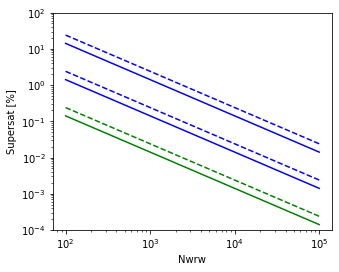

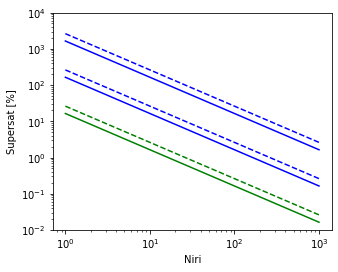

In [5]:
# KM03 Fig 2

def steady_supersat(Nwrw, u, f):
    """quasi steady supersaturation over water (Korolev Mazin 2003 Eq 16)"""
        
    S_qsw = f.a0*u/(f.bw*Nwrw)
    return S_qsw

# an empty paramas dict always selects the default values
params = dict()
params_alt = dict(rho_w='HS', D='HP', Ei='AB', Ew='AB')

Nwrw = np.logspace(2, 5)

fig, ax = plt.subplots(figsize=(5, 4))

S_qsw = steady_supersat(Nwrw, 10, af.get_factors(273.15+5, 690e2, **params))
ax.plot(Nwrw, S_qsw*100, color='b')
S_qsw = steady_supersat(Nwrw, 10, af.get_factors(273.15-30, 690e2, **params))
ax.plot(Nwrw, S_qsw*100, "--", color='b')

S_qsw = steady_supersat(Nwrw, 1, af.get_factors(273.15+5, 690e2, **params))
ax.plot(Nwrw, S_qsw*100, color='b')
S_qsw = steady_supersat(Nwrw, 1, af.get_factors(273.15-30, 690e2, **params))
ax.plot(Nwrw, S_qsw*100, "--", color='b')

S_qsw = steady_supersat(Nwrw, 0.1, af.get_factors(273.15+5, 690e2, **params))
ax.plot(Nwrw, S_qsw*100, color='g')
S_qsw = steady_supersat(Nwrw, 0.1, af.get_factors(273.15-30, 690e2, **params))
ax.plot(Nwrw, S_qsw*100, "--", color='g')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Nwrw')
ax.set_ylabel('Supersat [%]')
ax.set_ylim([1e-4, 1e2])

fig.savefig('plots/KM03_fig2.png', transparent=True)

def steady_supersat_i(Niri, u, f):
    """quasi steady supersaturation over ice (Korolev Mazin 2003 Eq 20)"""
    
    S_qsi = f.a0*u/(f.bi_0*Niri)
    # either a0 is too large -> L_w too large?
    # or bi_0 is too small   -> L_i too small, or Bi_0 too small
    # both especially for low temperatures
    return S_qsi

Niri = np.logspace(0, 3)


#TEst with 690hpa
params_alt = dict(rho_w='HS', k='PK', D="HP")
params = dict()

fig, ax = plt.subplots(figsize=(5, 4))

S_qsi = steady_supersat_i(Niri, 10, af.get_factors(273.15-5, 690e2, **params))
ax.plot(Niri, S_qsi*100, color='b')
S_qsi = steady_supersat_i(Niri, 10, af.get_factors(273.15-35, 690e2, **params))
ax.plot(Niri, S_qsi*100, "--", color='b')

S_qsi = steady_supersat_i(Niri, 1, af.get_factors(273.15-5, 690e2, **params))
ax.plot(Niri, S_qsi*100, color='b')
S_qsi = steady_supersat_i(Niri, 1, af.get_factors(273.15-35, 690e2, **params))
ax.plot(Niri, S_qsi*100, "--", color='b')

S_qsi = steady_supersat_i(Niri, 0.1, af.get_factors(273.15-5, 690e2, **params))
ax.plot(Niri, S_qsi*100, color='g')
S_qsi = steady_supersat_i(Niri, 0.1, af.get_factors(273.15-35, 690e2, **params))
ax.plot(Niri, S_qsi*100, "--", color='g')

# S_qsi = steady_supersat_i(Niri, 0.1, af.get_factors(273.15-35, 690e2, **params_alt))
# ax.plot(Niri, S_qsi*100, "--", color='g')



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Niri')
ax.set_ylabel('Supersat [%]')
ax.set_ylim([1e-2, 1e4])

fig.savefig('plots/KM03_fig5.png', transparent=True)


input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}


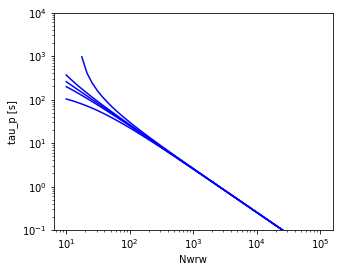

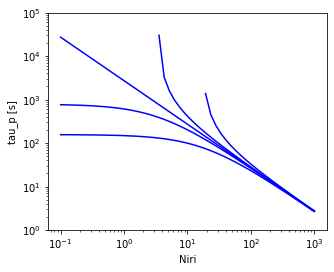

In [6]:

def calc_tau_p(Nwrw, u, f):
    """phase relaxation time for water  (Korolev Mazin 2003 Eq 18)"""
    
    tau_p = 1/(f.a0*u+f.bw*Nwrw)
    tau_p[tau_p < 0] = np.nan
    return tau_p

params_alt = dict(rho_w='HS', D='HP', Ei='AB', Ew='AB')
params = dict()

Nwrw = np.logspace(1, 5)

fig, ax = plt.subplots(figsize=(5, 4))


tau_p = calc_tau_p(Nwrw, 0, af.get_factors(273.15, 680e2, **params))
ax.plot(Nwrw, tau_p, color='b')

tau_p = calc_tau_p(Nwrw, 2, af.get_factors(273.15, 680e2, **params))
ax.plot(Nwrw, tau_p, color='b')
tau_p = calc_tau_p(Nwrw, -2, af.get_factors(273.15, 680e2, **params))
ax.plot(Nwrw, tau_p, color='b')

tau_p = calc_tau_p(Nwrw, 10, af.get_factors(273.15, 680e2, **params))
ax.plot(Nwrw, tau_p, color='b')
tau_p = calc_tau_p(Nwrw, -10, af.get_factors(273.15, 680e2, **params))
ax.plot(Nwrw, tau_p, color='b')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Nwrw')
ax.set_ylabel('tau_p [s]')
ax.set_ylim([1e-1, 1e4])

fig.savefig('plots/KM03_fig3.png', transparent=True)


def calc_tau_p_i(Niri, u, f):
    """phase relaxation time for ice  (Korolev Mazin 2003 Eq 21)"""
    
    
    tau_p = 1/(f.a0*u+f.bi_0*Niri)
    tau_p[tau_p < 0] = np.nan
    return tau_p

Niri = np.logspace(-1, 3)

fig, ax = plt.subplots(figsize=(5, 4))

tau_p = calc_tau_p_i(Niri, 0, af.get_factors(273.15-10, 680e2, **params))
ax.plot(Niri, tau_p, color='b')

tau_p = calc_tau_p_i(Niri, 2, af.get_factors(273.15-10, 680e2, **params))
ax.plot(Niri, tau_p, color='b')
tau_p = calc_tau_p_i(Niri, -2, af.get_factors(273.15-10, 680e2, **params))
ax.plot(Niri, tau_p, color='b')

tau_p = calc_tau_p_i(Niri, 10, af.get_factors(273.15-10, 680e2, **params))
ax.plot(Niri, tau_p, color='b')
tau_p = calc_tau_p_i(Niri, -10, af.get_factors(273.15-10, 680e2, **params))
ax.plot(Niri, tau_p, color='b')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Niri')
ax.set_ylabel('tau_p [s]')
ax.set_ylim([1e-0, 1e5])

fig.savefig('plots/KM03_fig6.png', transparent=True)

input kwargs:  {}
ksi 1.0500308300078438
a0 0.0006096383520841335
bi_s 1.7836040754998755e-05
input kwargs:  {}
ksi 1.4032760804590962
a0 0.0008191691678447923
bi_s 0.00012748963418544214
input kwargs:  {'Lw': 'FB', 'Li': 'FB', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
ksi 1.405335001681094
a0 0.0008206978361630093
bi_s 0.0001214816888034393
--------------------------------------------------------------------------------
input kwargs:  {'rho_w': 'HS', 'D': 'HP', 'Ei': 'AB', 'Ew': 'AB'}
ksi 1.0498729757313043
a0 0.0006096366592959764
bw 0.0003690193841201046
input kwargs:  {'rho_w': 'HS', 'D': 'HP', 'Ei': 'AB', 'Ew': 'AB'}
ksi 1.4077312576312502
a0 0.0008191689013161975
bw 0.0003016384152222649
input kwargs:  {'Lw': 'FB', 'Li': 'FB', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
ksi 1.405335001681094
a0 0.0008206978361630093
bw 0.00030163540694078974


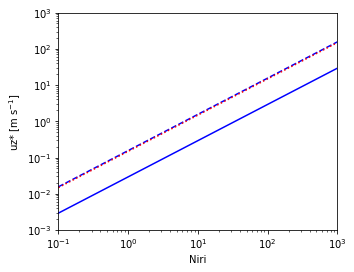

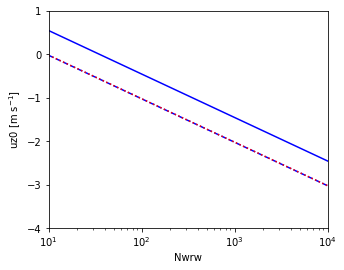

In [7]:
def get_uz_s(Niri, f):
    """threshold vertical velocity for liquid saturation u_z* (Korolev Mazin 2003 Eq 22)"""
    
    
    print('ksi', f.ksi)
    print('a0', f.a0)
    print('bi_s', f.bi_s)
    uz_s = f.bi_s*Niri/(f.a0)
    return uz_s

Niri = np.logspace(-1, 3)


#Test with 690hpa
params_alt = dict(Lw='FB', Li='FB', rho_w='HS', D="HP", Ei='GG', Ew='GG')
params = dict()

fig, ax = plt.subplots(figsize=(5, 4))

uz = get_uz_s(Niri, af.get_factors(273.15-5, 680e2, **params))
ax.plot(Niri, uz, color='b')
uz = get_uz_s(Niri, af.get_factors(273.15-35, 680e2, **params))
ax.plot(Niri, uz, "--", color='b')

uz = get_uz_s(Niri, af.get_factors(273.15-35, 680e2, **params_alt))
ax.plot(Niri, uz, ":", color='r')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Niri')
ax.set_ylabel('uz* [m s$^{-1}$]')
ax.set_ylim([1e-3, 1e3])
ax.set_xlim([1e-1, 1e3])

fig.savefig('plots/KM03_fig10.png', transparent=True)

print("--------------------------------------------------------------------------------")
def get_uz_0(Nwrw, f):
    """threshold vertical velocity for ice saturation u_z0 (Korolev Mazin 2003 Eq 23)"""
    
    print('ksi', f.ksi)
    print('a0', f.a0)
    print('bw', f.bw)
    uz_0 = ((1-f.ksi)*f.bw*Nwrw)/(f.ksi*f.a0)
    return uz_0

Nwrw = np.logspace(1, 4)


#TEst with 690hpa
params = dict(rho_w='HS', D='HP')
params = dict(rho_w='HS', D='HP', Ei='AB', Ew='AB')
params_alt = dict(Lw='FB', Li='FB', rho_w='HS', D="HP", Ei='GG', Ew='GG')

fig, ax = plt.subplots(figsize=(5, 4))

uz = get_uz_0(Nwrw, af.get_factors(273.15-5, 680e2, **params))
ax.plot(Nwrw, -np.log10(-uz), color='b')
uz = get_uz_0(Nwrw, af.get_factors(273.15-35, 680e2, **params))
ax.plot(Nwrw, -np.log10(-uz), "--", color='b')

uz = get_uz_0(Nwrw, af.get_factors(273.15-35, 680e2, **params_alt))
ax.plot(Nwrw, -np.log10(-uz), ":", color='r')

ax.set_xscale('log')
ax.set_xlabel('Nwrw')
ax.set_ylabel('uz0 [m s$^{-1}$]')
ax.set_ylim([-4, 1])
ax.set_xlim([1e1, 1e4])

fig.savefig('plots/KM03_fig11.png', transparent=True)

input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}


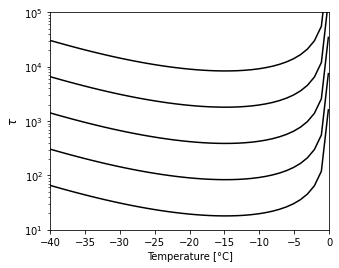

In [8]:
    
def t_gl2003(Ni, qw, qi, f):
    """Korolev Mazin 2003 Eq 30
    
    needed to modify the prefactor to agree with the Pinsky 2014 results
    (units also do not resolve to [s] otherwise)
    """
    c = 1
       
    T = (((qw+qi)/Ni)**(2/3)-(qi/Ni)**2/3)
    tau_gl = 1/(4*np.pi*c*f.Ai*(f.ksi-1))*((9*np.pi*af.rho_i)/(2*f.rho_a**2))**(1/3)*T
    tau_gl = 1/(4*np.pi*c*f.Ai*(f.ksi-1))*((9*np.pi*af.rho_i)/(2))**(1/3)*T
    
    tau_gl = 1/(4*np.pi*c*f.Ai*(f.ksi-1))*(2*np.pi**(1/3)*(3*f.rho_a/(4*af.rho_i))**(2/3))*T
#     tau_gl = 1/(4*np.pi*c*f.Ai*(f.ksi-1))*T
#     tau_gl = 3/(2*(f.ksi - 1)*f.upsilon_i*f.Bi)*T

    return tau_gl


Ts = np.arange(-40.1,0.15,1)

params = dict(Lw='RY',rho_w='HS', D='HP', Ei='GG', Ew='GG')
params = dict()



fig, ax = plt.subplots(figsize=(5, 4))

params = dict()
tau = t_gl2003(1e-3*1e6, 0.1e-3, 0, af.get_factors(273.15+Ts, 680e2, **params))
ax.plot(Ts, tau, 'k')
tau = t_gl2003(1e-2*1e6, 0.1e-3, 0, af.get_factors(273.15+Ts, 680e2, **params))
ax.plot(Ts, tau, 'k')
tau = t_gl2003(1e-1*1e6, 0.1e-3, 0, af.get_factors(273.15+Ts, 680e2, **params))
ax.plot(Ts, tau, 'k')
tau = t_gl2003(1e-0*1e6, 0.1e-3, 0, af.get_factors(273.15+Ts, 680e2, **params))
ax.plot(Ts, tau, 'k')
tau = t_gl2003(1e+1*1e6, 0.1e-3, 0, af.get_factors(273.15+Ts, 680e2, **params))
ax.plot(Ts, tau, 'k')


ax.set_ylim([1e1, 1e5])
ax.set_yscale('log')
ax.set_xlim([-40, 0])

ax.set_ylabel('$\\tau$', fontsize=12)
ax.set_xlabel('Temperature [°C]')


fig.savefig('plots/KM03_fig13.png', transparent=True)